Вариант 21

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

Очистить от пропусков

In [17]:

df = pd.read_excel('./data5/Volgmed_2013.xlsx', skiprows=1)[['Пол', 'Рост, см']]
df = df[((df['Пол'] == 'жен') | (df['Пол'] == 'жен.')) & (df['Рост, см'].isnull() != True) & (df['Рост, см'] != 'освобобожденная') & (df['Рост, см'] != 'освобождена от сдачи нормативов') & (df['Рост, см'] != 'спец. Группа') & (df['Рост, см'] != 'освобождена')]
df


,Пол,"Рост, см"
0,жен,176
1,жен,176
8,жен,166
9,жен,166
10,жен,166
...,...,...
4213,жен,167.5
4214,жен,170
4215,жен,161.5
4216,жен,170


Очистить от выбросов

In [18]:
data = df['Рост, см'].to_numpy()
q_025 = np.quantile(data, 0.25)
q_075 = np.quantile(data, 0.75)
iqd = q_075 - q_025
upper_threshold = q_075 + 1.5 * iqd
lower_threshold = q_025 - 1.5 * iqd

print(lower_threshold, upper_threshold)

df_clean = df.loc[(df['Рост, см'] <= upper_threshold) & (df['Рост, см'] >= lower_threshold)]
df_clean

147.5 183.5


,Пол,"Рост, см"
0,жен,176
1,жен,176
8,жен,166
9,жен,166
10,жен,166
...,...,...
4213,жен,167.5
4214,жен,170
4215,жен,161.5
4216,жен,170


Эмперическая функция распределения

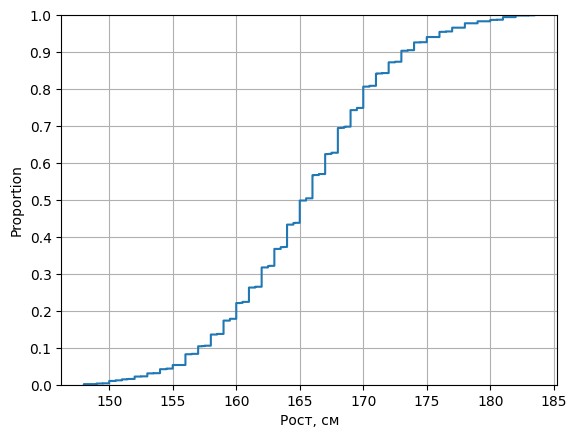

In [19]:

power_data = df_clean['Рост, см'].copy()
ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()

Гистограмма

<Axes: xlabel='Рост, см', ylabel='Count'>

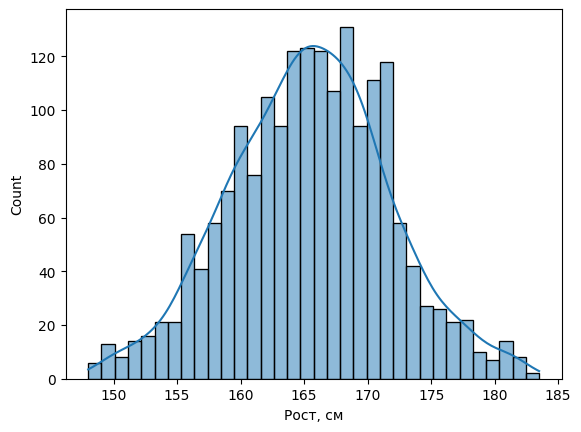

In [20]:
sns.histplot(df_clean['Рост, см'], bins=34, kde=True)


Аппроксимировать одним нормальным распределением

Gaussian 1: mu = 1.65e+02, sigma = 6.3, weight = 1.0


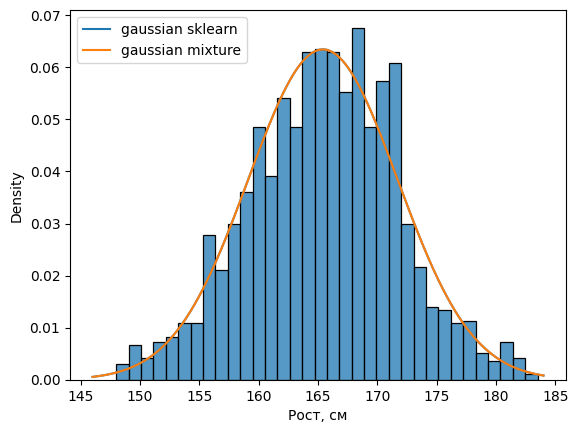

Average log-likelihood= -3.2578769914991357


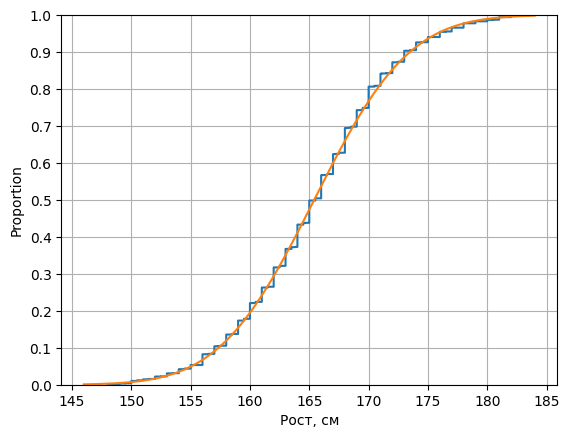

In [21]:
X=np.linspace(146,184,num=2000)
Y=norm.cdf(X,np.mean(power_data),np.std(power_data))

x=X
gm = GaussianMixture(n_components=1, tol=0.000001)
gm.fit(np.expand_dims(power_data, 1))
Gaussian_nr = 1
for mu, sd, p in zip(gm.means_.flatten(), np.sqrt(gm.covariances_.flatten()), gm.weights_):
    print('Gaussian {:}: mu = {:.3}, sigma = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    gs = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, gs, label='gaussian sklearn')
    Gaussian_nr += 1

sns.histplot(power_data, bins=34, kde=False, stat="density")
gm_sum = np.exp([gm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gm_sum, label='gaussian mixture')
plt.legend()
plt.show()
print('Average log-likelihood=',gm.score(np.expand_dims(power_data, 1)))

ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.plot(X,Y)
plt.show()

Аппроксимировать смесью двух нормальных распределений

Gaussian 1: mu = 1.63e+02, sigma = 5.7, weight = 0.41
Gaussian 2: mu = 1.67e+02, sigma = 5.9, weight = 0.59


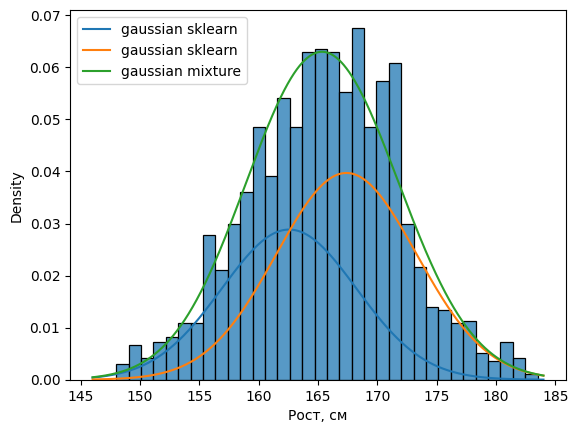

Average log-likelihood= -3.257848474954536


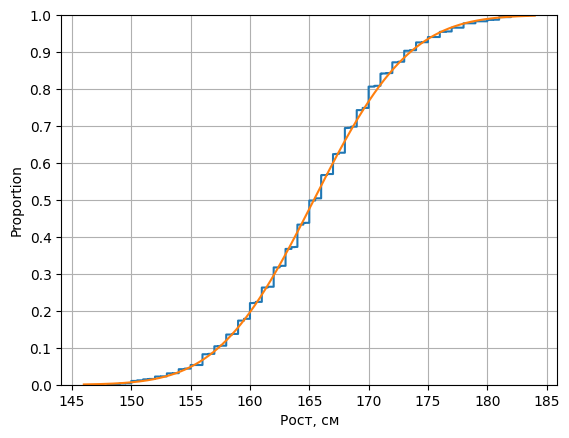

In [22]:

x=X
gm = GaussianMixture(n_components = 2, tol=0.000001)
gm.fit(np.expand_dims(power_data, 1))
Gaussian_nr = 1
Y = 0
for mu, sd, p in zip(gm.means_.flatten(), np.sqrt(gm.covariances_.flatten()), gm.weights_):
    print('Gaussian {:}: mu = {:.3}, sigma = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    gs = stats.norm(mu, sd).pdf(x) * p
    Y += p*norm.cdf(X, mu, sd)
    plt.plot(x, gs, label='gaussian sklearn')
    Gaussian_nr += 1

sns.histplot(power_data, bins=34, kde=False, stat="density")
gm_sum = np.exp([gm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gm_sum, label='gaussian mixture')
plt.legend()
plt.show()
print('Average log-likelihood=',gm.score(np.expand_dims(power_data, 1)))

ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.plot(X,Y)
plt.show()

Аппроксимировать смесью трех нормальных распределений

Gaussian 1: mu = 1.61e+02, sigma = 4.8, weight = 0.41
Gaussian 2: mu = 1.67e+02, sigma = 3.7, weight = 0.48
Gaussian 3: mu = 1.75e+02, sigma = 3.8, weight = 0.11


c:\Python\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


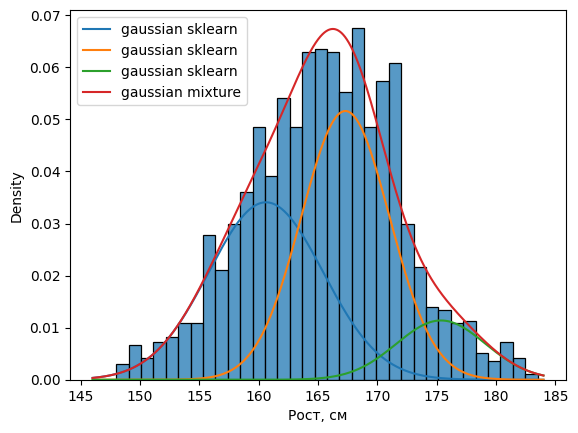

Average log-likelihood= -3.2544542885613987


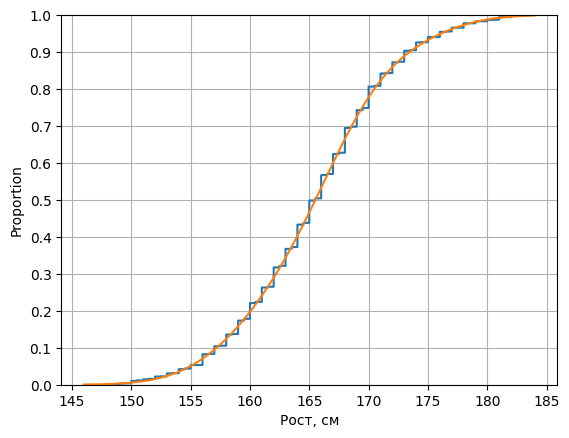

In [23]:
x=X
gm = GaussianMixture(n_components = 3, tol=0.000001)
gm.fit(np.expand_dims(power_data, 1))
Gaussian_nr = 1
Y = 0
for mu, sd, p in zip(gm.means_.flatten(), np.sqrt(gm.covariances_.flatten()), gm.weights_):
    print('Gaussian {:}: mu = {:.3}, sigma = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    gs = stats.norm(mu, sd).pdf(x) * p
    Y += p * norm.cdf(X, mu, sd)
    plt.plot(x, gs, label='gaussian sklearn')
    Gaussian_nr += 1

sns.histplot(power_data, bins=34, kde=False, stat="density")
gm_sum = np.exp([gm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gm_sum, label='gaussian mixture')
plt.legend()
plt.show()
print('Average log-likelihood=',gm.score(np.expand_dims(power_data, 1)))

ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.plot(X,Y)
plt.show()

In [24]:
df = df[df['Рост, см'] > 0]
df['Рост, см'] = np.log(df['Рост, см'].apply(float))
df

,Пол,"Рост, см"
0,жен,5.170484
1,жен,5.170484
8,жен,5.111988
9,жен,5.111988
10,жен,5.111988
...,...,...
4213,жен,5.120983
4214,жен,5.135798
4215,жен,5.084505
4216,жен,5.135798


In [25]:
array = df['Рост, см'].to_numpy()
q_025 = np.quantile(array,0.25)
q_075 = np.quantile(array,0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd

df_clean = df.loc[(df['Рост, см'] <= upper_threshold) & (df['Рост, см'] >= lower_threshold)]
df_clean

,Пол,"Рост, см"
0,жен,5.170484
1,жен,5.170484
8,жен,5.111988
9,жен,5.111988
10,жен,5.111988
...,...,...
4213,жен,5.120983
4214,жен,5.135798
4215,жен,5.084505
4216,жен,5.135798


Эмперическая функция распределения

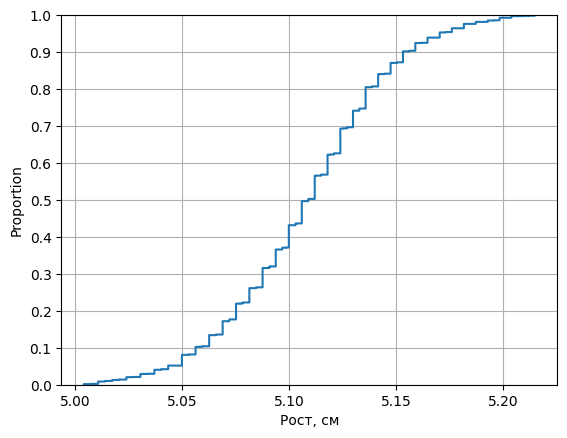

In [26]:
power_data = df_clean['Рост, см'].copy()
ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()

Гистограмма

<Axes: xlabel='Рост, см', ylabel='Count'>

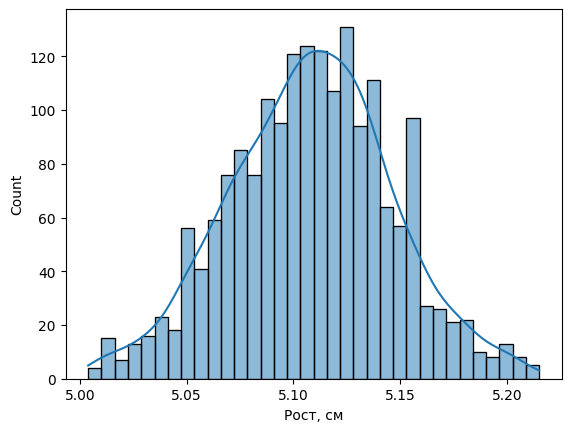

In [27]:
sns.histplot(df_clean['Рост, см'], bins=34, kde=True)

Аппроксимировать одним нормальным распределением

Gaussian 1: mu = 5.11, sigma = 0.038, weight = 1.0


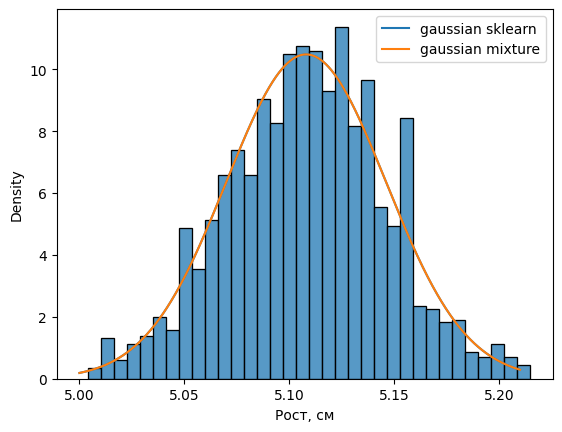

Average log-likelihood= 1.8497502036113191


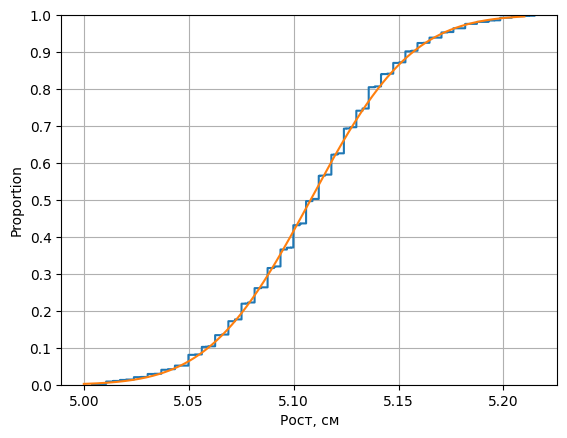

In [28]:
X=np.linspace(5,5.21,num=2000)
Y=norm.cdf(X,np.mean(power_data),np.std(power_data))

x=X
gm = GaussianMixture(n_components=1, tol=0.000001)
gm.fit(np.expand_dims(power_data, 1))
Gaussian_nr = 1
for mu, sd, p in zip(gm.means_.flatten(), np.sqrt(gm.covariances_.flatten()), gm.weights_):
    print('Gaussian {:}: mu = {:.3}, sigma = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    gs = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, gs, label='gaussian sklearn')
    Gaussian_nr += 1

sns.histplot(power_data, bins=34, kde=False, stat="density")
gm_sum = np.exp([gm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gm_sum, label='gaussian mixture')
plt.legend()
plt.show()
print('Average log-likelihood=',gm.score(np.expand_dims(power_data, 1)))

ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.plot(X,Y)
plt.show()

Аппроксимировать смесью двух нормальных распределений

Gaussian 1: mu = 5.12, sigma = 0.034, weight = 0.53
Gaussian 2: mu = 5.09, sigma = 0.036, weight = 0.47


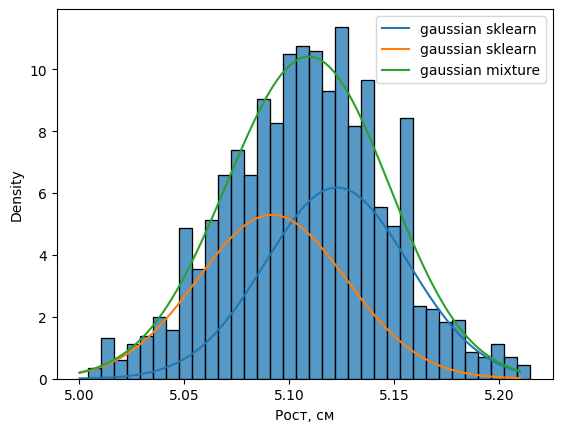

Average log-likelihood= 1.8499228816020397


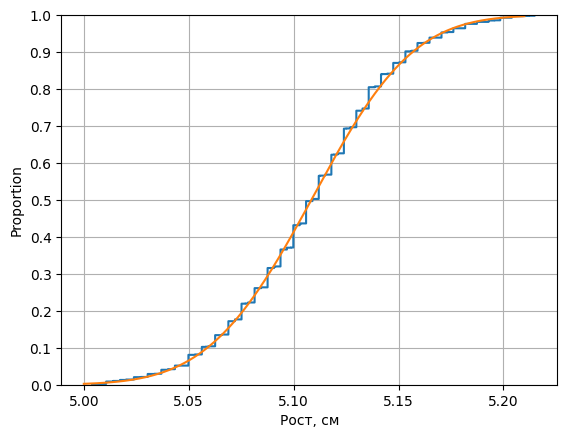

In [29]:
x=X
gm = GaussianMixture(n_components = 2, tol=0.000001)
gm.fit(np.expand_dims(power_data, 1))
Gaussian_nr = 1
Y = 0
for mu, sd, p in zip(gm.means_.flatten(), np.sqrt(gm.covariances_.flatten()), gm.weights_):
    print('Gaussian {:}: mu = {:.3}, sigma = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    gs = stats.norm(mu, sd).pdf(x) * p
    Y += p*norm.cdf(X, mu, sd)
    plt.plot(x, gs, label='gaussian sklearn')
    Gaussian_nr += 1

sns.histplot(power_data, bins=34, kde=False, stat="density")
gm_sum = np.exp([gm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gm_sum, label='gaussian mixture')
plt.legend()
plt.show()
print('Average log-likelihood=',gm.score(np.expand_dims(power_data, 1)))

ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.plot(X,Y)
plt.show()

Аппроксимировать смесью трех нормальных распределений

Gaussian 1: mu = 5.06, sigma = 0.025, weight = 0.18
Gaussian 2: mu = 5.13, sigma = 0.033, weight = 0.35
Gaussian 3: mu = 5.11, sigma = 0.025, weight = 0.47


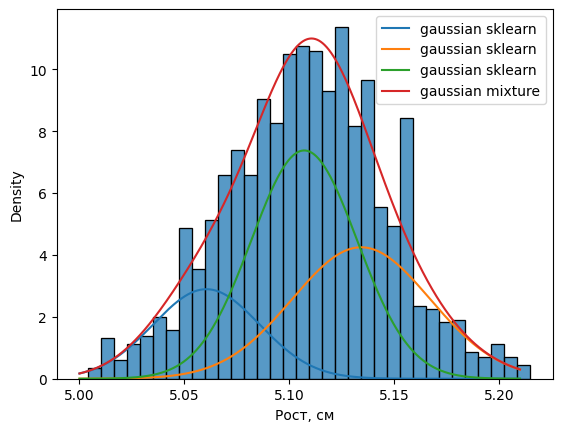

Average log-likelihood= 1.8518542213882232


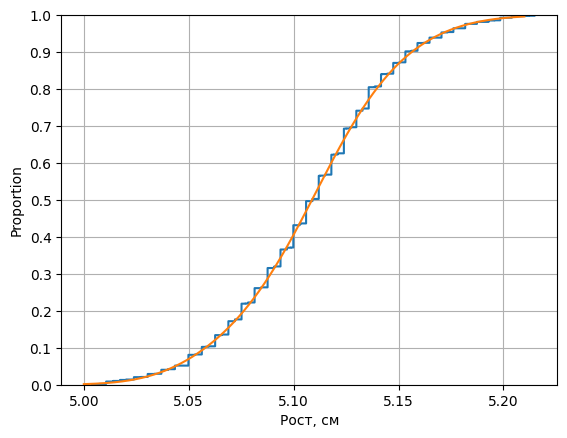

In [30]:
x=X
gm = GaussianMixture(n_components = 3, tol=0.000001)
gm.fit(np.expand_dims(power_data, 1))
Gaussian_nr = 1
Y = 0
for mu, sd, p in zip(gm.means_.flatten(), np.sqrt(gm.covariances_.flatten()), gm.weights_):
    print('Gaussian {:}: mu = {:.3}, sigma = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    gs = stats.norm(mu, sd).pdf(x) * p
    Y += p * norm.cdf(X, mu, sd)
    plt.plot(x, gs, label='gaussian sklearn')
    Gaussian_nr += 1

sns.histplot(power_data, bins=34, kde=False, stat="density")
gm_sum = np.exp([gm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gm_sum, label='gaussian mixture')
plt.legend()
plt.show()
print('Average log-likelihood=',gm.score(np.expand_dims(power_data, 1)))

ax = sns.ecdfplot(power_data)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.plot(X,Y)
plt.show()